###### DataSet
- https://www.kaggle.com/c/santander-customer-transaction-prediction/data
    
###### Results:
- https://www.kaggle.com/c/santander-customer-transaction-prediction/submissions

In [57]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import statsmodels.api as sm
sns.set(style = "white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('santander-customer-transaction-prediction/train.csv')
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
df_test = pd.read_csv('santander-customer-transaction-prediction/test.csv')
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [4]:
print(len(df_train.head()))
print(len(df_test.head()))

5
5


In [59]:
print(len(df_train[df_train.target == 0]))
print(len(df_train[df_train.target == 1]))
target_no = len(df_train[df_train.target == 0])
target_yes = len(df_train[df_train.target == 1])

179902
20098


In [60]:
print("total percentage of target_no: {}".format(target_no/(target_no + target_yes)))
print("total percentage of target_yes: {}".format(target_yes/(target_no + target_yes)))

total percentage of target_no: 0.89951
total percentage of target_yes: 0.10049


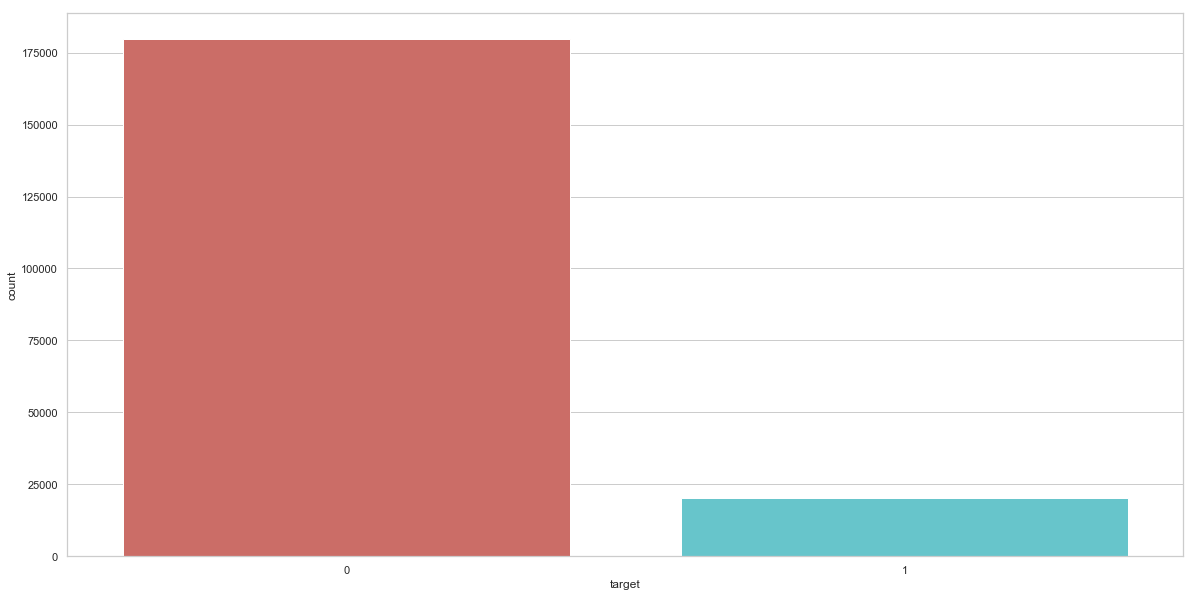

In [62]:
sns.countplot(x= 'target', data = df_train, palette='hls')
plt.show()

In [65]:
features = df_train.columns.values[2 : 202]
features

array(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19',
       'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25',
       'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43',
       'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49',
       'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61',
       'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67',
       'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79',
       'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85',
       'var_86', 'var_87', 'var_88', 'var_89', 'var_

In [67]:
X = df_train.loc[:, df_train.columns != 'target']
X = X.loc[:, 'var_0':'var_199']
Y = df_train.loc[:, df_train.columns == 'target']

In [68]:
os = SMOTE(random_state=0)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [70]:
columns = X_train.columns
list(columns)

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [71]:
print(len(X_train)/len(X))
print(len(X_test)/len(X))

0.7
0.3


In [72]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

In [73]:
os_data_y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
print(len(os_data_y))
print(len(os_data_X))

252032
252032


In [75]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['Y'])

In [76]:
print(os_data_X.head())
print(os_data_y.head())

     var_0   var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0   9.9033 -6.0516  12.1419  3.0077  12.8212  -9.6917  7.3423  11.8161   
1  11.3038  1.2183  13.5127  8.4610   9.9571 -10.9624  7.1679  17.0716   
2   7.2911  0.8227   8.8249  6.1246  12.2001   1.2689  4.3771  17.5977   
3   8.5268  2.8446  11.6393  9.9546  12.8575  -9.1851  4.9769  19.0616   
4   8.0130 -3.5147  12.3460  4.7736  11.1152 -19.5064  6.5382  11.4782   

    var_8   var_9   ...     var_190  var_191  var_192  var_193  var_194  \
0 -4.3445  7.0116   ...      8.9455   4.5096   3.7278   0.9718  19.1443   
1 -1.2128  6.3232   ...     -2.3408  10.0193  -0.1363   2.3947  18.9564   
2  4.2393  6.2859   ...      3.4072   2.4401   2.6135   5.8496  18.4770   
3 -1.8164  8.5476   ...      2.1173  15.5806   2.2208  -5.7872  17.9758   
4  3.2165  9.4837   ...      7.7848   8.7941   2.8345  -0.4258  19.8262   

   var_195  var_196  var_197  var_198  var_199  
0   2.4637   3.5480   8.9620  17.2829 -19.0865  
1   1.

In [77]:
print("length of oversampled data is ",len(os_data_X))
print("Number of 0 target values in oversampled data",len(os_data_y[os_data_y['Y']== 0]))
print("Number of 1 target values in oversampled data",len(os_data_y[os_data_y['Y']== 1]))
print("Proportion of 0 target values data in oversampled data is ",len(os_data_y[os_data_y['Y']==0])/len(os_data_X))
print("Proportion of 1 target values in oversampled data is ",len(os_data_y[os_data_y['Y']==1])/len(os_data_X))

length of oversampled data is  252032
Number of 0 target values in oversampled data 126016
Number of 1 target values in oversampled data 126016
Proportion of 0 target values data in oversampled data is  0.5
Proportion of 1 target values in oversampled data is  0.5


In [78]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,9.903300,-6.051600,12.141900,3.007700,12.821200,-9.691700,7.342300,11.816100,-4.344500,7.011600,...,8.945500,4.509600,3.727800,0.971800,19.144300,2.463700,3.548000,8.962000,17.282900,-19.086500
1,11.303800,1.218300,13.512700,8.461000,9.957100,-10.962400,7.167900,17.071600,-1.212800,6.323200,...,-2.340800,10.019300,-0.136300,2.394700,18.956400,1.071600,4.536300,9.704800,19.384200,-14.657500
2,7.291100,0.822700,8.824900,6.124600,12.200100,1.268900,4.377100,17.597700,4.239300,6.285900,...,3.407200,2.440100,2.613500,5.849600,18.477000,0.401300,-4.156900,8.722400,15.091800,6.206000
3,8.526800,2.844600,11.639300,9.954600,12.857500,-9.185100,4.976900,19.061600,-1.816400,8.547600,...,2.117300,15.580600,2.220800,-5.787200,17.975800,2.526200,7.078400,9.226200,14.453100,1.977700
4,8.013000,-3.514700,12.346000,4.773600,11.115200,-19.506400,6.538200,11.478200,3.216500,9.483700,...,7.784800,8.794100,2.834500,-0.425800,19.826200,1.525600,-8.268000,7.739200,15.491000,-8.123400
5,12.260500,-6.174700,12.980700,5.199200,11.378700,1.021100,6.193400,12.040800,4.507700,6.499700,...,1.743200,7.377900,2.128500,1.334400,21.280700,-0.573000,-1.805900,10.079300,18.870800,-10.383800
6,7.106600,2.844900,8.117400,3.223600,9.017300,-12.238800,7.808700,15.043300,0.759100,6.717500,...,-4.011000,9.915400,1.599900,7.030100,25.189100,-0.128300,-6.267000,8.352000,9.714700,10.606900
7,10.221000,-6.900900,11.234400,7.914900,9.752900,-10.752800,4.304200,17.962100,-0.642000,7.840300,...,1.583500,6.395600,1.542400,3.859000,17.243400,0.845100,7.016400,8.493300,16.222800,-7.375200
8,7.907800,-2.780300,6.847500,6.546200,9.775900,4.745600,4.994800,20.200300,-2.222900,6.217900,...,-0.578200,7.474700,1.516800,-2.551500,20.241900,2.526100,1.921900,7.582700,22.039500,12.075400
9,10.755000,-2.563500,14.027700,7.293400,9.840800,-12.222800,5.416200,19.526600,0.279900,8.369500,...,1.106900,6.560700,1.758400,2.057100,19.225600,-2.910000,-4.112300,8.831700,15.299600,-4.561100


In [79]:
data_final_vars = os_data_X.columns.values.tolist()

In [80]:
data_final_vars

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [81]:
y= ['Y']
y

['Y']

In [82]:
X=[i for i in data_final_vars if i not in y]
len(X)

200

In [83]:
logreg = LogisticRegression()

In [145]:
rfe = RFE(logreg, 2000)
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=2000, step=1, verbose=0)

In [146]:
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

In [147]:
# The mask of selected features.
print(rfe.support_)

# The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [148]:
X = os_data_X[data_final_vars]
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,9.9033,-6.0516,12.1419,3.0077,12.8212,-9.6917,7.3423,11.8161,-4.3445,7.0116,...,8.9455,4.5096,3.7278,0.9718,19.1443,2.4637,3.5480,8.9620,17.2829,-19.0865
1,11.3038,1.2183,13.5127,8.4610,9.9571,-10.9624,7.1679,17.0716,-1.2128,6.3232,...,-2.3408,10.0193,-0.1363,2.3947,18.9564,1.0716,4.5363,9.7048,19.3842,-14.6575
2,7.2911,0.8227,8.8249,6.1246,12.2001,1.2689,4.3771,17.5977,4.2393,6.2859,...,3.4072,2.4401,2.6135,5.8496,18.4770,0.4013,-4.1569,8.7224,15.0918,6.2060
3,8.5268,2.8446,11.6393,9.9546,12.8575,-9.1851,4.9769,19.0616,-1.8164,8.5476,...,2.1173,15.5806,2.2208,-5.7872,17.9758,2.5262,7.0784,9.2262,14.4531,1.9777
4,8.0130,-3.5147,12.3460,4.7736,11.1152,-19.5064,6.5382,11.4782,3.2165,9.4837,...,7.7848,8.7941,2.8345,-0.4258,19.8262,1.5256,-8.2680,7.7392,15.4910,-8.1234


In [149]:
y = os_data_y['Y']
Y

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [150]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.435964
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.371      
Dependent Variable: Y                AIC:              220153.7778
Date:               2019-06-10 23:08 BIC:              222241.2401
No. Observations:   252032           Log-Likelihood:   -1.0988e+05
Df Model:           199              LL-Null:          -1.7470e+05
Df Residuals:       251832           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
var_0      0.0608     0.0019    32.7634   0.0000    0.0571    0.0644
var_1      0.0492     0.0014    34.9729   0.0

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [100]:
classifierVals = DecisionTreeClassifier(max_leaf_nodes=1000, random_state=0)
classifierVals.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [101]:
type(classifierVals)

sklearn.tree.tree.DecisionTreeClassifier

In [102]:
test_data = df_test[df_test.columns[1: 201]]

In [103]:
predictions = classifierVals.predict(test_data)

In [104]:
len(predictions[predictions == 0])

192274

In [105]:
len(predictions[predictions == 1])

7726

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
regressor = RandomForestClassifier(n_estimators= 1000 , random_state=0)

In [108]:
regressor.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [110]:
test_data = df_test[df_test.columns[1: 201]]

In [111]:
y_pred = regressor.predict(test_data)

In [112]:
len(y_pred[y_pred == 0])

200000

In [113]:
len(y_pred[y_pred == 1])

0

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [152]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
test_data = df_test[df_test.columns[1: 201]]

In [131]:
y_predict = logreg.predict(test_data)

In [132]:
len(y_predict[y_predict == 0])

147259

In [133]:
len(y_predict[y_predict == 1])

52741

In [154]:
test_data = df_test[df_test.columns[1: 201]]

In [155]:
y_predict = logreg.predict(test_data)

In [156]:
len(y_predict[y_predict == 0])

147259

In [157]:
len(y_predict[y_predict == 1])

52741

In [142]:
# Saving the data in the Kaggle form

colid_code = np.array(df_test.ID_code)

In [143]:
predictons = pd.DataFrame({'ID_code':colid_code, 'target':y_predict})
predictons

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,0
3,test_3,1
4,test_4,0
5,test_5,0
6,test_6,0
7,test_7,1
8,test_8,0
9,test_9,0


In [144]:
predictons.to_csv('sample_submission.csv', index= False)